In [22]:
from island_abm import *
from generic_abm import *

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

0


/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

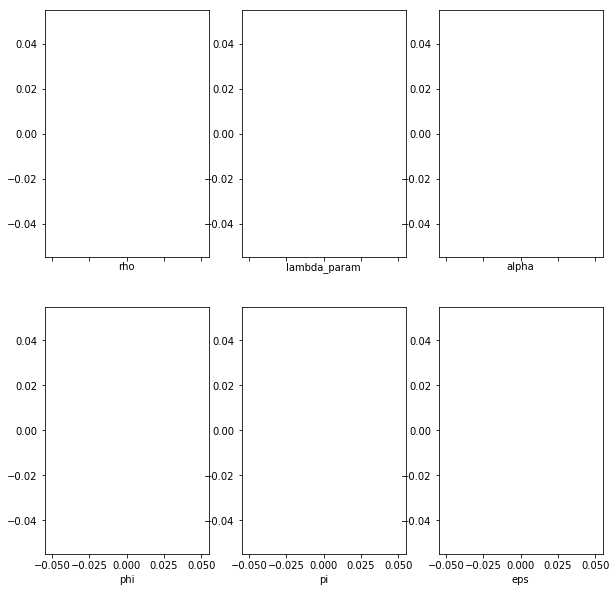

In [23]:
# Set the ABM Evaluation Budget
n_train_samples = 100

# Set test size
n_test_samples = 0

# Set the ABM parameters and support
island_abm_exploration_range = np.array([(0.0, 10.0),  # rho            (degree of locality in the diffustion of knowledge)
                                         (0.0, 5.0),   # lambda_param   (mean of Poisson r.v. - jumps in technology)
                                         (0.8, 2.0),   # alpha          (productivity of labour in extraction)
                                         (0.0, 1.0),   # phi            (cumulative learning effect)
                                         (0.0, 1.0),   # pi             (probability of finding a new island)
                                         (0.0, 1.0)])  # eps            (willingness to explore)

# Get parameters for train and test from the support
X_train, X_test = get_unirand_parameter_samples(n_train_samples, n_test_samples, island_abm_exploration_range)

# Run the ABM on the train and test parameters
y_train, y_test =  island_abm_evaluate_samples(X_train, X_test, "binary")

# Make dataframe of the training data
df = pd.concat([pd.DataFrame(X_train, columns = ["rho", "lambda_param", "alpha", "phi", "pi", "eps"]), 
                pd.DataFrame(y_train, columns = ["result"])], 
                axis = 1)

# Subset the dataframe to just the accepted parameters
df_success = df[df["result"] == 1.0]

# Print how many parameter sets were accepted
print df_success.shape[0]
 
# plot
f, axes = plt.subplots(2, 3, figsize = (10, 10), sharex = True)
sns.distplot(df_success["rho"],             ax = axes[0, 0])
sns.distplot(df_success["lambda_param"],    ax = axes[0, 1])
sns.distplot(df_success["alpha"],           ax = axes[0, 2])
sns.distplot(df_success["phi"],             ax = axes[1, 0])
sns.distplot(df_success["pi"],              ax = axes[1, 1])
sns.distplot(df_success["eps"],             ax = axes[1, 2])

In [13]:
df.head(20)

,rho,lambda_param,alpha,phi,pi,eps,result
0,0.013901,1.494401,1.117384,0.650955,0.527225,0.655761,0.0
1,3.379957,4.766298,1.618934,0.512201,0.326107,0.718749,0.0
2,4.122110,4.824420,0.887945,0.477436,0.197614,0.284787,0.0
3,0.302008,0.709462,1.285229,0.754333,0.094770,0.130151,0.0
4,3.742700,4.013173,1.510446,0.584746,0.637909,0.359715,0.0
5,5.350761,2.277300,1.487060,0.942115,0.700420,0.343649,0.0
6,7.588042,3.772803,1.651538,0.405806,0.354855,0.064480,0.0
7,7.232130,0.047214,1.919523,0.458940,0.334755,0.974313,0.0
8,3.732672,4.313119,0.874735,0.660165,0.514414,0.306516,0.0
9,6.300259,3.272370,1.422500,0.747029,0.175039,0.522429,0.0
